# SEED BASED FUNCTIONAL CONNECTIVITY 

In this notebook, I will explore the seed based functional connectivity by selecting various seed regions. In the first part, I compare the avarege FC maps across two different emotional conditions using a t-test.  
In the second part of the notebook I will repeat the process with different preprocessed datas ["allemotions"] ["whitenoise"] which I will explain in more detail later.

In [1]:
import nilearn as nil
import nibabel as nib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nilearn import plotting, surface, datasets
from scipy.stats import pearsonr, spearmanr
from tqdm import tqdm # For having progressbar during loops
from nitime.timeseries import TimeSeries
from nitime.analysis import FilterAnalyzer

# LOAD THE BRAIN MASK AND THE ATLAS

In [2]:
main_path='/Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/functional_connectivity/data-2/group_mask/' # Path to the folder with the brain mask
filename='group_mask.nii.gz' # List of the subjects

mask_ = nib.load(main_path+filename) # Load the nii.gz file of the subject
mask_header = mask_.header # Subject's header
mask_affine = mask_.affine # Subject's affine
mask = mask_.get_fdata() # Get the numpy version of the nii.gz file
print(mask.shape) # x*y*z*time
n_vox_mask = np.sum(mask==1) # Number of voxels within the mask

(52, 62, 52)


In [3]:
which_atlas = 'glasser' # Chose the atlas
main_path='/Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/functional_connectivity/data-2/atlas/' # Path to the folder with the atlas
filename = 'glasser_MNI152NLin6Asym_labels_p20_resamp.nii.gz'
atlas_labels_file = 'glasser_labels.csv'
delimiter = ','

atlas_ = nib.load(main_path+'/'+which_atlas+'/'+filename) # Load the nii.gz file of the subject
atlas_header = atlas_.header # Subject's header
atlas_affine = atlas_.affine # Subject's affine
atlas = atlas_.get_fdata() # Get the numpy version of the nii.gz file
print(atlas.shape) # x*y*z*time

# Labels
atlas_labels = pd.read_csv(main_path+'/'+which_atlas+'/'+atlas_labels_file, delimiter=delimiter)
print(atlas.min(), atlas.max())


(52, 62, 52)
0.0 360.0


# DEFINE THE SEED AREA
I define different seed regions to highlight their activity in comparison to the activity of other voxels.  
We need to comment out the ones we don't need and select the one we do need for each case.

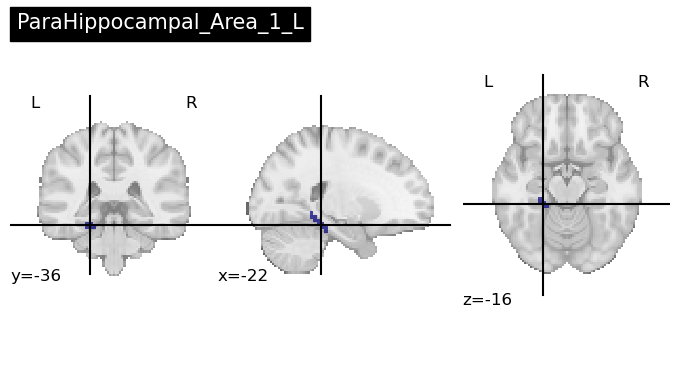

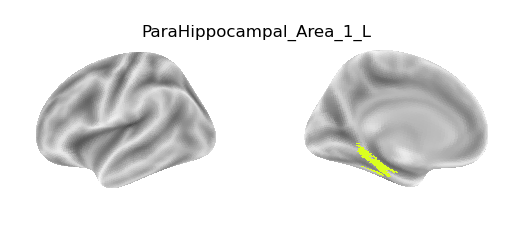

In [4]:

seed_areas = atlas_labels.loc[atlas_labels['regionLongName']=='ParaHippocampal_Area_1_L']
seed_idxs = seed_areas['regionID'].values # Indexes of the seed areas
seed_areas

# Create a brain mask of our seed region
seeds_mask = np.zeros(atlas.shape)
for seed in seed_idxs:
    seeds_mask += (atlas==seed)
    
## Plot the seed region

# Plot over the volume of the brain
seeds_img = nib.Nifti1Image(seeds_mask.astype(np.int16), atlas_affine) # Create a new image for the selected region
plotting.plot_roi(seeds_img, display_mode='ortho', title='ParaHippocampal_Area_1_L')
plotting.show()

# Plot over the surface of the brain ##
fsaverage = datasets.fetch_surf_fsaverage()
texture_left = surface.vol_to_surf(seeds_img, fsaverage.pial_left)
texture_left[np.where(texture_left!=0)] = 1

fig, axs = plt.subplots(1,2, subplot_kw={'projection': '3d'})
# left hemisphere
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='lateral',axes=axs[0])
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='medial', axes=axs[1])
fig.suptitle('ParaHippocampal_Area_1_L', x=0.51, y=0.7)

plotting.show()

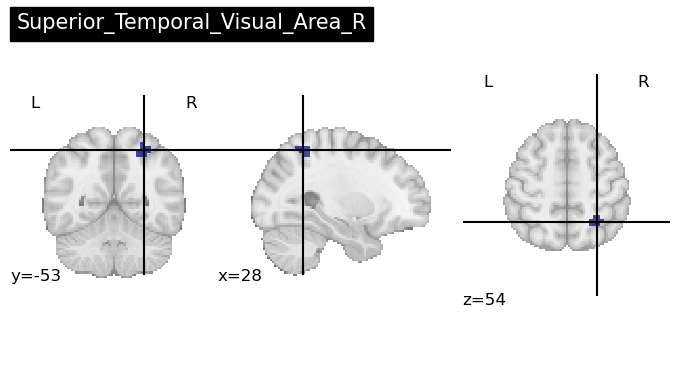

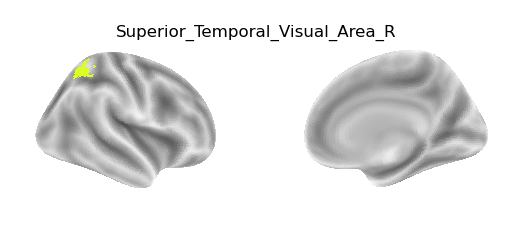

In [16]:

seed_areas = atlas_labels.loc[atlas_labels['regionLongName']=='Superior_Temporal_Visual_Area_R']
seed_idxs = seed_areas['regionID'].values # Indexes of the seed areas
seed_areas

# Create a brain mask of our seed region
seeds_mask = np.zeros(atlas.shape)
for seed in seed_idxs:
    seeds_mask += (atlas==seed)
    
## Plot the seed region

# Plot over the volume of the brain
seeds_img = nib.Nifti1Image(seeds_mask.astype(np.int16), atlas_affine) # Create a new image for the selected region
plotting.plot_roi(seeds_img, display_mode='ortho', title='Superior_Temporal_Visual_Area_R')
plotting.show()

# Plot over the surface of the brain ### Surface plot: right hemisphere

fsaverage = datasets.fetch_surf_fsaverage()

# Convert volume mask to right hemisphere surface texture
texture_right = surface.vol_to_surf(seeds_img, fsaverage.pial_right)
texture_right[np.where(texture_right != 0)] = 1  # Binarize

# Plotting
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

# Right hemisphere, lateral view
plotting.plot_surf_roi(
    fsaverage.infl_right, texture_right,
    bg_map=fsaverage.sulc_right,
    hemi='right', view='lateral',
    axes=axs[0], colorbar=False
)

# Right hemisphere, medial view
plotting.plot_surf_roi(
    fsaverage.infl_right, texture_right,
    bg_map=fsaverage.sulc_right,
    hemi='right', view='medial',
    axes=axs[1], colorbar=False
)

fig.suptitle('Superior_Temporal_Visual_Area_R', x=0.51, y=0.7)
plotting.show()

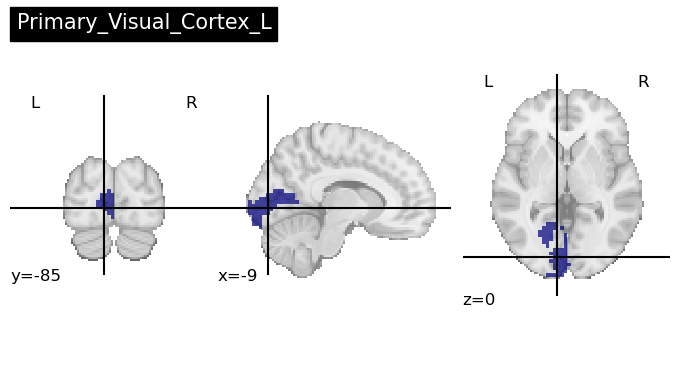

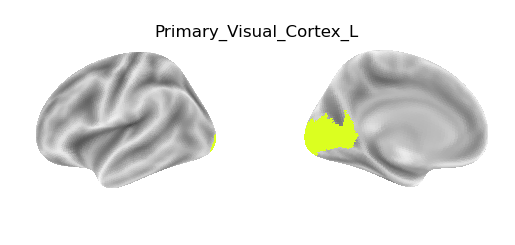

In [15]:

seed_areas = atlas_labels.loc[atlas_labels['regionLongName']=='Primary_Visual_Cortex_L']
seed_idxs = seed_areas['regionID'].values # Indexes of the seed areas
seed_areas

# Create a brain mask of our seed region
seeds_mask = np.zeros(atlas.shape)
for seed in seed_idxs:
    seeds_mask += (atlas==seed)
    
## Plot the seed region

# Plot over the volume of the brain
seeds_img = nib.Nifti1Image(seeds_mask.astype(np.int16), atlas_affine) # Create a new image for the selected region
plotting.plot_roi(seeds_img, display_mode='ortho', title='Primary_Visual_Cortex_L')
plotting.show()

# Plot over the surface of the brain ##
fsaverage = datasets.fetch_surf_fsaverage()
texture_left = surface.vol_to_surf(seeds_img, fsaverage.pial_left)
texture_left[np.where(texture_left!=0)] = 1

fig, axs = plt.subplots(1,2, subplot_kw={'projection': '3d'})
# left hemisphere
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='lateral',axes=axs[0])
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='medial', axes=axs[1])
fig.suptitle('Primary_Visual_Cortex_L', x=0.51, y=0.7)

plotting.show()

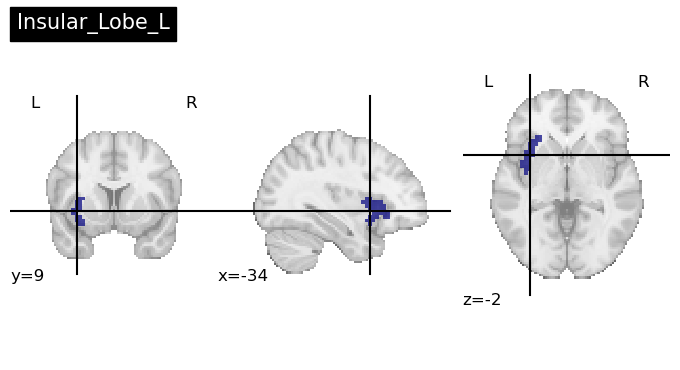

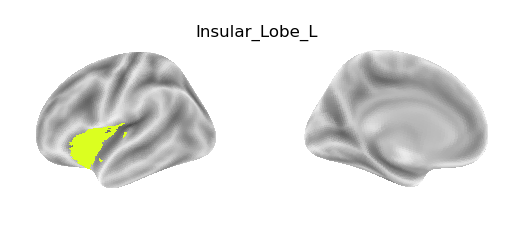

In [63]:

# List of regions to search for
region_names = [
    'Posterior_Insular_Area_2_L', 
    'Middle_Insular_Area_L', 
    'Anterior_Ventral_Insular_Area_L', 
    'Anterior_Agranular_Insula_Complex_L', 
    'Area_Posterior_Insular_1_L'
    'Insular_Granular_Complex_L'
    'Frontal_Opercular_Area_3_L'
]

# Filtering the rows that match the region names
seed_areas = atlas_labels.loc[atlas_labels['regionLongName'].isin(region_names)]

# Extracting the indices
seed_idxs = seed_areas['regionID'].values

# Display
seed_areas

# Create a brain mask of our seed region
seeds_mask = np.zeros(atlas.shape)
for seed in seed_idxs:
    seeds_mask += (atlas==seed)
    
## Plot the seed region

# Plot over the volume of the brain
seeds_img = nib.Nifti1Image(seeds_mask.astype(np.int16), atlas_affine) # Create a new image for the selected region
plotting.plot_roi(seeds_img, display_mode='ortho', title='Insular_Lobe_L')
plotting.show()

# Plot over the surface of the brain ##
fsaverage = datasets.fetch_surf_fsaverage()
texture_left = surface.vol_to_surf(seeds_img, fsaverage.pial_left)
texture_left[np.where(texture_left!=0)] = 1

fig, axs = plt.subplots(1,2, subplot_kw={'projection': '3d'})
# left hemisphere
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='lateral',axes=axs[0])
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='medial', axes=axs[1])
fig.suptitle('Insular_Lobe_L', x=0.51, y=0.7)

plotting.show()


# AVAREGE FC MAP FOR THE SEED REGION IN THE FIRST CONDITION

In [9]:
import os
import numpy as np
import nibabel as nib
from scipy.stats import pearsonr


main_path = "/Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/"
filelist = [f"sub-{i:02d}" for i in range(11, 21)]  

# At first, choose the coorrelation measure
corr_measure = pearsonr

mask_cord = np.where(mask==1) # Coordinates of all the voxel within the brain mask



fcmap_allsub_emotion1 = np.empty(mask.shape)[np.newaxis,:,:,:]
fcmap_allsub_p_emotion1 = np.empty(mask.shape)[np.newaxis,:,:,:]



# Loop over the subjects
for subject_id in filelist:
    file_path = os.path.join(main_path, subject_id, "func", f"concatenated_emotions_{subject_id}", f"{subject_id}_calm.nii.gz" )

    print(f"Loading: {file_path}")
    
    sub_ = nib.load(file_path)        # Load the nii.gz file of the subject
    sub_header = sub_.header          # Subject's header
    sub_affine = sub_.affine          # Subject's affine
    sub = sub_.get_fdata()            # Get the numpy version of the nii.gz file
    print(f"{subject_id} shape:", sub.shape)  # x*y*z*time
    
    # Filter an entire subject
    sub_filtered = np.copy(sub)
    TR = sub_.header.get_zooms()[3]
    for v in tqdm(range(n_vox_mask)):
        voxel_ts = sub[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] # time series of the single voxel
        T = TimeSeries(voxel_ts.T, sampling_interval=TR)
        F = FilterAnalyzer(T, ub=0.08, lb=0.008) #0.08, 0.008
        tmp_TC_filt = F.filtered_boxcar.data
        tmp_TC_filt = tmp_TC_filt.T
        sub_filtered[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] = tmp_TC_filt
#     plt.plot(tmp_TC_filt, label='filtered', alpha=0.75)
#     plt.plot(voxel_ts, label='original', alpha=0.75)
#     plt.legend()

    # Extract the time series of the seed region
    seed_voxels = sub_filtered[seeds_mask==1]
    seed_ts = seed_voxels.mean(axis=0)
    
    
    fcmap = np.empty(mask.shape) # Initialize the functional connectivity map
    fcmap_p = np.empty(mask.shape) # p-values related the correlation measure
    mask_cord = np.where(mask==1) # Coordinates of all the voxel within the brain mask

    
## Correlation ##
# Loop over all the voxel of the brain
    for v in tqdm(range(n_vox_mask)):
        voxel_ts = sub_filtered[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] # time series of the single voxel
        corr = corr_measure(seed_ts, voxel_ts)
        fcmap[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v]] = corr[0]
        fcmap_p[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v]] = corr[1]

        
    
    # Concatenate all the subjects
    fcmap_allsub_emotion1 = np.concatenate((fcmap_allsub_emotion1, fcmap[np.newaxis,:,:,:]))
    fcmap_allsub_p_emotion1 = np.concatenate((fcmap_allsub_p_emotion1, fcmap_p[np.newaxis,:,:,:]))

    
    
    

Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-11/func/concatenated_emotions_sub-11/sub-11_calm.nii.gz
sub-11 shape: (52, 62, 52, 20)


  0%|                                                 | 0/50151 [00:00<?, ?it/s]/var/folders/gq/bvv781yn5vx6lj6h56v__my80000gn/T/ipykernel_4922/2534641281.py:62: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = corr_measure(seed_ts, voxel_ts)
100%|███████████████████████████████████| 50151/50151 [00:47<00:00, 1059.04it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-12/func/concatenated_emotions_sub-12/sub-12_calm.nii.gz
sub-12 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [01:06<00:00, 750.36it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-13/func/concatenated_emotions_sub-13/sub-13_calm.nii.gz
sub-13 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:56<00:00, 880.68it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-14/func/concatenated_emotions_sub-14/sub-14_calm.nii.gz
sub-14 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:58<00:00, 850.02it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-15/func/concatenated_emotions_sub-15/sub-15_calm.nii.gz
sub-15 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:55<00:00, 899.46it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-16/func/concatenated_emotions_sub-16/sub-16_calm.nii.gz
sub-16 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:52<00:00, 958.19it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-17/func/concatenated_emotions_sub-17/sub-17_calm.nii.gz
sub-17 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:54<00:00, 926.26it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-18/func/concatenated_emotions_sub-18/sub-18_calm.nii.gz
sub-18 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:56<00:00, 888.20it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-19/func/concatenated_emotions_sub-19/sub-19_calm.nii.gz
sub-19 shape: (52, 62, 52, 20)


100%|███████████████████████████████████| 50151/50151 [00:50<00:00, 1001.83it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-20/func/concatenated_emotions_sub-20/sub-20_calm.nii.gz
sub-20 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:55<00:00, 902.26it/s]


/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


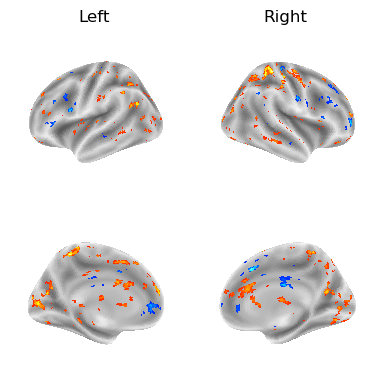

In [10]:
# Plot the FC map

av_fcmap_allsub = fcmap_allsub_emotion1.mean(axis=0)
av_fcmap_p_allsub = fcmap_allsub_p_emotion1.mean(axis=0)
# # threshold the Fc maps with the pvalues 
fcmap_thresholded = np.copy(av_fcmap_allsub)
fcmap_thresholded[np.where(av_fcmap_p_allsub>0.05)] = 0

fsaverage = datasets.fetch_surf_fsaverage()
fcmap_img = nib.Nifti1Image(av_fcmap_allsub, sub_affine)
texture_left = surface.vol_to_surf(fcmap_img, fsaverage.pial_left)
texture_right = surface.vol_to_surf(fcmap_img, fsaverage.pial_right)

thresh = 0.2 # Threshold for the brain plots

fig, axs = plt.subplots(2,2, subplot_kw={'projection': '3d'}, figsize=(4,4))
# Left hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       title='Left', view='lateral',colorbar=False, threshold=thresh, axes=axs[0][0])
# Right hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right,hemi='right',
                       title='Right', view='lateral', colorbar=False, threshold=thresh, axes=axs[0][1])
# Right hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][0])
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right,hemi='right',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][1])
plt.tight_layout()
plotting.show()

# AVAREGE FC MAP FOR THE SEED REGION IN THE SECOND CONDITION

In [11]:
import os
import numpy as np
import nibabel as nib
from scipy.stats import pearsonr


main_path = "/Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/"
filelist = [f"sub-{i:02d}" for i in range(11, 21)] 

# At first, choose the coorrelation measure
corr_measure = pearsonr

mask_cord = np.where(mask==1) # Coordinates of all the voxel within the brain mask



fcmap_allsub_emotion2 = np.empty(mask.shape)[np.newaxis,:,:,:]
fcmap_allsub_p_emotion2 = np.empty(mask.shape)[np.newaxis,:,:,:]



# Loop over the subjects
for subject_id in filelist:
    file_path = os.path.join(main_path, subject_id, "func", f"concatenated_emotions_{subject_id}", f"{subject_id}_excited.nii.gz" )

    print(f"Loading: {file_path}")
    
    sub_ = nib.load(file_path)        # Load the nii.gz file of the subject
    sub_header = sub_.header          # Subject's header
    sub_affine = sub_.affine          # Subject's affine
    sub = sub_.get_fdata()            # Get the numpy version of the nii.gz file
    print(f"{subject_id} shape:", sub.shape)  # x*y*z*time
    
    # Filter an entire subject
    sub_filtered = np.copy(sub)
    TR = sub_.header.get_zooms()[3]
    for v in tqdm(range(n_vox_mask)):
        voxel_ts = sub[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] # time series of the single voxel
        T = TimeSeries(voxel_ts.T, sampling_interval=TR)
        F = FilterAnalyzer(T, ub=0.08, lb=0.008) #0.08, 0.008
        tmp_TC_filt = F.filtered_boxcar.data
        tmp_TC_filt = tmp_TC_filt.T
        sub_filtered[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] = tmp_TC_filt
#     plt.plot(tmp_TC_filt, label='filtered', alpha=0.75)
#     plt.plot(voxel_ts, label='original', alpha=0.75)
#     plt.legend()

    # Extract the time series of the seed region
    seed_voxels = sub_filtered[seeds_mask==1]
    seed_ts = seed_voxels.mean(axis=0)
    
    
    fcmap = np.empty(mask.shape) # Initialize the functional connectivity map
    fcmap_p = np.empty(mask.shape) # p-values related the correlation measure
    mask_cord = np.where(mask==1) # Coordinates of all the voxel within the brain mask

    
## Correlation ##
# Loop over all the voxel of the brain
    for v in tqdm(range(n_vox_mask)):
        voxel_ts = sub_filtered[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] # time series of the single voxel
        corr = corr_measure(seed_ts, voxel_ts)
        fcmap[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v]] = corr[0]
        fcmap_p[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v]] = corr[1]

        
    
    # Concatenate all the subjects
    fcmap_allsub_emotion2 = np.concatenate((fcmap_allsub_emotion2, fcmap[np.newaxis,:,:,:]))
    fcmap_allsub_p_emotion2 = np.concatenate((fcmap_allsub_p_emotion2, fcmap_p[np.newaxis,:,:,:]))


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-11/func/concatenated_emotions_sub-11/sub-11_excited.nii.gz
sub-11 shape: (52, 62, 52, 20)


  0%|                                                 | 0/50151 [00:00<?, ?it/s]/var/folders/gq/bvv781yn5vx6lj6h56v__my80000gn/T/ipykernel_4922/4139774508.py:62: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = corr_measure(seed_ts, voxel_ts)
100%|███████████████████████████████████| 50151/50151 [00:41<00:00, 1198.58it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-12/func/concatenated_emotions_sub-12/sub-12_excited.nii.gz
sub-12 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:57<00:00, 870.88it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-13/func/concatenated_emotions_sub-13/sub-13_excited.nii.gz
sub-13 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:56<00:00, 890.02it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-14/func/concatenated_emotions_sub-14/sub-14_excited.nii.gz
sub-14 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:54<00:00, 912.29it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-15/func/concatenated_emotions_sub-15/sub-15_excited.nii.gz
sub-15 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:58<00:00, 863.30it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-16/func/concatenated_emotions_sub-16/sub-16_excited.nii.gz
sub-16 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:54<00:00, 919.18it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-17/func/concatenated_emotions_sub-17/sub-17_excited.nii.gz
sub-17 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:59<00:00, 845.07it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-18/func/concatenated_emotions_sub-18/sub-18_excited.nii.gz
sub-18 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:51<00:00, 964.74it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-19/func/concatenated_emotions_sub-19/sub-19_excited.nii.gz
sub-19 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:52<00:00, 953.44it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-20/func/concatenated_emotions_sub-20/sub-20_excited.nii.gz
sub-20 shape: (52, 62, 52, 20)


100%|████████████████████████████████████| 50151/50151 [00:54<00:00, 924.69it/s]


/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


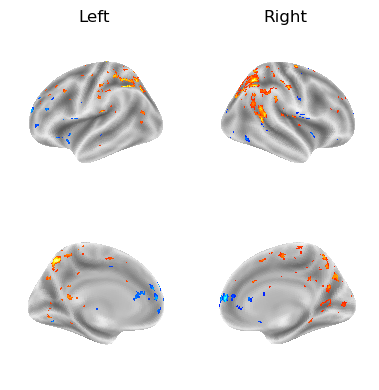

In [12]:
# Plot the FC map

av_fcmap_allsub = fcmap_allsub_emotion2.mean(axis=0)
av_fcmap_p_allsub = fcmap_allsub_p_emotion2.mean(axis=0)
# # threshold the Fc maps with the pvalues 
fcmap_thresholded = np.copy(av_fcmap_allsub)
fcmap_thresholded[np.where(av_fcmap_p_allsub>0.05)] = 0

fsaverage = datasets.fetch_surf_fsaverage()
fcmap_img = nib.Nifti1Image(av_fcmap_allsub, sub_affine)
texture_left = surface.vol_to_surf(fcmap_img, fsaverage.pial_left)
texture_right = surface.vol_to_surf(fcmap_img, fsaverage.pial_right)

thresh = 0.2 # Threshold for the brain plots

fig, axs = plt.subplots(2,2, subplot_kw={'projection': '3d'}, figsize=(4,4))
# Left hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       title='Left', view='lateral',colorbar=False, threshold=thresh, axes=axs[0][0])
# Right hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right,hemi='right',
                       title='Right', view='lateral', colorbar=False, threshold=thresh, axes=axs[0][1])
# Right hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][0])
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right,hemi='right',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][1])
plt.tight_layout()
plotting.show()

# COMPUTE THE T TEST

In [13]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection

t_brain = np.zeros(mask.shape)
p_brain_uncorr = np.ones(mask.shape)

mask_coord = np.where(mask == 1)
n_vox = len(mask_coord[0])

t_values = []
p_values = []

# Perform voxel-by-voxel t-test
for v in tqdm(range(n_vox)):
    x, y, z = mask_coord[0][v], mask_coord[1][v], mask_coord[2][v]
    
    # Extract voxel values for both emotions
    emotion1_voxels = fcmap_allsub_emotion1[:, x, y, z]
    emotion2_voxels = fcmap_allsub_emotion2[:, x, y, z]
    
    # Perform the t-test
    t, p = ttest_ind(emotion1_voxels, emotion2_voxels, equal_var=False)
    
    # Store t and p values in the corresponding positions
    t_brain[x, y, z] = t
    p_brain_uncorr[x, y, z] = p
    
    t_values.append(t)
    p_values.append(p)

# Correct for multiple comparisons
rej, p_corr = fdrcorrection(p_values, alpha=0.05)
p_brain_corr = np.ones(mask.shape)

from statsmodels.stats.multitest import multipletests
#rej, p_corr, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')


# Insert corrected p-values into the map
for idx, v in enumerate(range(n_vox)):
    x, y, z = mask_coord[0][v], mask_coord[1][v], mask_coord[2][v]
    p_brain_corr[x, y, z] = p_corr[idx]


100%|████████████████████████████████████| 50151/50151 [01:22<00:00, 606.45it/s]


/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


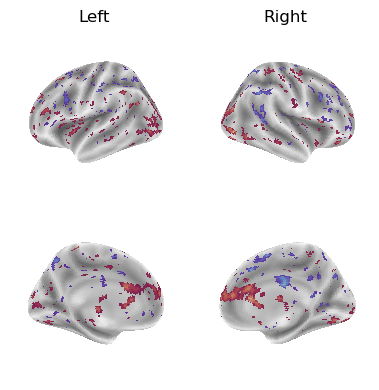

In [14]:
t_brain_thresh = np.copy(t_brain)
t_brain_thresh[p_brain_corr > 0.05] = 0

# Plot on the surface
fsaverage = datasets.fetch_surf_fsaverage()
tmap_img = nib.Nifti1Image(t_brain_thresh, affine=sub_affine)
texture_left = surface.vol_to_surf(tmap_img, fsaverage.pial_left)
texture_right = surface.vol_to_surf(tmap_img, fsaverage.pial_right)

thresh=0.8

fig, axs = plt.subplots(2,2, subplot_kw={'projection': '3d'}, figsize=(4,4))
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left, hemi='left',
                            title='Left', view='lateral', colorbar=False, threshold=thresh, axes=axs[0][0], cmap='twilight')
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right, hemi='right',
                            title='Right', view='lateral', colorbar=False, threshold=thresh, axes=axs[0][1], cmap='twilight')
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left, hemi='left',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][0], cmap='twilight')
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right, hemi='right',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][1], cmap='twilight')


plt.tight_layout()
plt.show()



# ALL EMOTIONS VS WHITE NOISE

I define the seed mask for this particular study to examine the differences in the functional connectivity maps of activations related to the Primary Visual Cortex area.  
In the first FC map, I show the average functional connectivity map, where for each subject, I have concatenated all the time series related to the eliciting stimuli from the previous notebook.["allemotions"]  
In the second FC map, I display the case where I concatenated the time series of the white noise.["whitenoise"]  

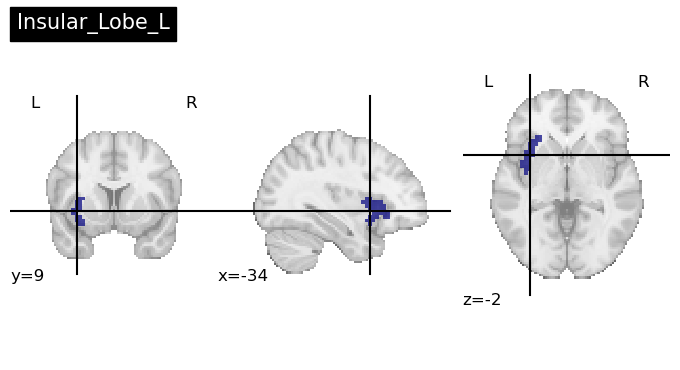

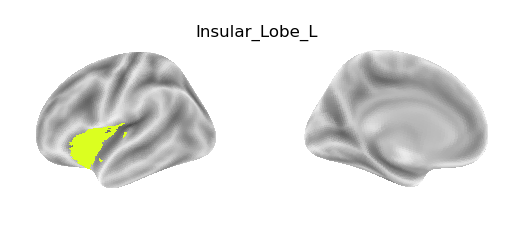

In [40]:

# List of regions to search for
region_names = [
    'Posterior_Insular_Area_2_L', 
    'Middle_Insular_Area_L', 
    'Anterior_Ventral_Insular_Area_L', 
    'Anterior_Agranular_Insula_Complex_L', 
    'Area_Posterior_Insular_1_L'
    'Insular_Granular_Complex_L'
    'Frontal_Opercular_Area_3_L'
]

# Filtering the rows that match the region names
seed_areas = atlas_labels.loc[atlas_labels['regionLongName'].isin(region_names)]

# Extracting the indices
seed_idxs = seed_areas['regionID'].values

# Display
seed_areas

# Create a brain mask of our seed region
seeds_mask = np.zeros(atlas.shape)
for seed in seed_idxs:
    seeds_mask += (atlas==seed)
    
## Plot the seed region

# Plot over the volume of the brain
seeds_img = nib.Nifti1Image(seeds_mask.astype(np.int16), atlas_affine) # Create a new image for the selected region
plotting.plot_roi(seeds_img, display_mode='ortho', title='Insular_Lobe_L')
plotting.show()

# Plot over the surface of the brain ##
fsaverage = datasets.fetch_surf_fsaverage()
texture_left = surface.vol_to_surf(seeds_img, fsaverage.pial_left)
texture_left[np.where(texture_left!=0)] = 1

fig, axs = plt.subplots(1,2, subplot_kw={'projection': '3d'})
# left hemisphere
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='lateral',axes=axs[0])
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='medial', axes=axs[1])
fig.suptitle('Insular_Lobe_L', x=0.51, y=0.7)

plotting.show()


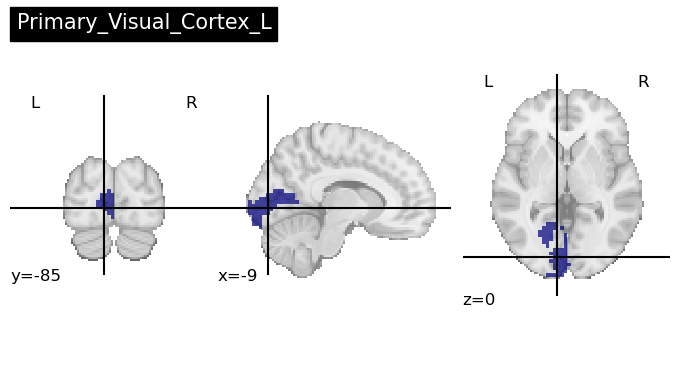

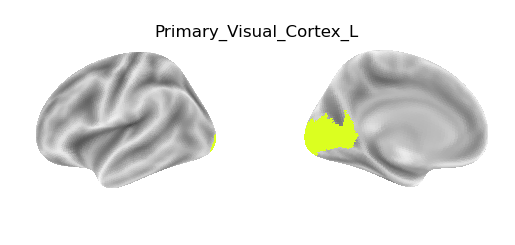

In [48]:

seed_areas = atlas_labels.loc[atlas_labels['regionLongName']=='Primary_Visual_Cortex_L']
seed_idxs = seed_areas['regionID'].values # Indexes of the seed areas
seed_areas

# Create a brain mask of our seed region
seeds_mask = np.zeros(atlas.shape)
for seed in seed_idxs:
    seeds_mask += (atlas==seed)
    
## Plot the seed region

# Plot over the volume of the brain
seeds_img = nib.Nifti1Image(seeds_mask.astype(np.int16), atlas_affine) # Create a new image for the selected region
plotting.plot_roi(seeds_img, display_mode='ortho', title='Primary_Visual_Cortex_L')
plotting.show()

# Plot over the surface of the brain ##
fsaverage = datasets.fetch_surf_fsaverage()
texture_left = surface.vol_to_surf(seeds_img, fsaverage.pial_left)
texture_left[np.where(texture_left!=0)] = 1

fig, axs = plt.subplots(1,2, subplot_kw={'projection': '3d'})
# left hemisphere
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='lateral',axes=axs[0])
plotting.plot_surf_roi(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       colorbar=False, view='medial', axes=axs[1])
fig.suptitle('Primary_Visual_Cortex_L', x=0.51, y=0.7)

plotting.show()

### FC map for [allemotions]

In [49]:
import os
import numpy as np
import nibabel as nib
from scipy.stats import pearsonr


main_path = "/Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/"
filelist = [f"sub-{i:02d}" for i in range(11, 21)]  

# At first, choose the coorrelation measure
corr_measure = pearsonr

mask_cord = np.where(mask==1) # Coordinates of all the voxel within the brain mask



fcmap_allsub_allemotions = np.empty(mask.shape)[np.newaxis,:,:,:]
fcmap_allsub_p_allemotions = np.empty(mask.shape)[np.newaxis,:,:,:]



# Loop over the subjects
for subject_id in filelist:
    file_path = os.path.join(main_path, subject_id, "func", f"concatenated_emotions_{subject_id}", f"{subject_id}_allemotions.nii.gz" )

    print(f"Loading: {file_path}")
    
    sub_ = nib.load(file_path)        # Load the nii.gz file of the subject
    sub_header = sub_.header          # Subject's header
    sub_affine = sub_.affine          # Subject's affine
    sub = sub_.get_fdata()            # Get the numpy version of the nii.gz file
    print(f"{subject_id} shape:", sub.shape)  # x*y*z*time
    
    # Filter an entire subject
    sub_filtered = np.copy(sub)
    TR = sub_.header.get_zooms()[3]
    for v in tqdm(range(n_vox_mask)):
        voxel_ts = sub[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] # time series of the single voxel
        T = TimeSeries(voxel_ts.T, sampling_interval=TR)
        F = FilterAnalyzer(T, ub=0.08, lb=0.008) #0.08, 0.008
        tmp_TC_filt = F.filtered_boxcar.data
        tmp_TC_filt = tmp_TC_filt.T
        sub_filtered[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] = tmp_TC_filt
#     plt.plot(tmp_TC_filt, label='filtered', alpha=0.75)
#     plt.plot(voxel_ts, label='original', alpha=0.75)
#     plt.legend()

    # Extract the time series of the seed region
    seed_voxels = sub_filtered[seeds_mask==1]
    seed_ts = seed_voxels.mean(axis=0)
    
    
    fcmap = np.empty(mask.shape) # Initialize the functional connectivity map
    fcmap_p = np.empty(mask.shape) # p-values related the correlation measure
    mask_cord = np.where(mask==1) # Coordinates of all the voxel within the brain mask

    
## Correlation ##
# Loop over all the voxel of the brain
    for v in tqdm(range(n_vox_mask)):
        voxel_ts = sub_filtered[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] # time series of the single voxel
        corr = corr_measure(seed_ts, voxel_ts)
        fcmap[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v]] = corr[0]
        fcmap_p[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v]] = corr[1]

        
    
    # Concatenate all the subjects
    fcmap_allsub_allemotions = np.concatenate((fcmap_allsub_allemotions, fcmap[np.newaxis,:,:,:]))
    fcmap_allsub_p_allemotions = np.concatenate((fcmap_allsub_p_allemotions, fcmap_p[np.newaxis,:,:,:]))

    
    

Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-11/func/concatenated_emotions_sub-11/sub-11_allemotions.nii.gz
sub-11 shape: (52, 62, 52, 100)


  0%|                                                 | 0/50151 [00:00<?, ?it/s]/var/folders/gq/bvv781yn5vx6lj6h56v__my80000gn/T/ipykernel_10998/1546552752.py:62: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = corr_measure(seed_ts, voxel_ts)
100%|███████████████████████████████████| 50151/50151 [00:41<00:00, 1217.32it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-12/func/concatenated_emotions_sub-12/sub-12_allemotions.nii.gz
sub-12 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:51<00:00, 979.19it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-13/func/concatenated_emotions_sub-13/sub-13_allemotions.nii.gz
sub-13 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:52<00:00, 963.33it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-14/func/concatenated_emotions_sub-14/sub-14_allemotions.nii.gz
sub-14 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:52<00:00, 960.62it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-15/func/concatenated_emotions_sub-15/sub-15_allemotions.nii.gz
sub-15 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:52<00:00, 959.63it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-16/func/concatenated_emotions_sub-16/sub-16_allemotions.nii.gz
sub-16 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:50<00:00, 998.44it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-17/func/concatenated_emotions_sub-17/sub-17_allemotions.nii.gz
sub-17 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:51<00:00, 972.06it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-18/func/concatenated_emotions_sub-18/sub-18_allemotions.nii.gz
sub-18 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:51<00:00, 975.57it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-19/func/concatenated_emotions_sub-19/sub-19_allemotions.nii.gz
sub-19 shape: (52, 62, 52, 100)


100%|███████████████████████████████████| 50151/50151 [00:48<00:00, 1033.12it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-20/func/concatenated_emotions_sub-20/sub-20_allemotions.nii.gz
sub-20 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:51<00:00, 977.90it/s]


/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


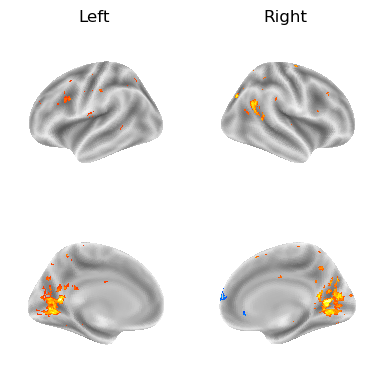

In [60]:
# Plot the FC map

av_fcmap_allsub = fcmap_allsub_allemotions.mean(axis=0)
av_fcmap_p_allsub = fcmap_allsub_p_allemotions.mean(axis=0)
# # threshold the Fc maps with the pvalues 
fcmap_thresholded = np.copy(av_fcmap_allsub)
fcmap_thresholded[np.where(av_fcmap_p_allsub>0.05)] = 0

fsaverage = datasets.fetch_surf_fsaverage()
fcmap_img = nib.Nifti1Image(av_fcmap_allsub, sub_affine)
texture_left = surface.vol_to_surf(fcmap_img, fsaverage.pial_left)
texture_right = surface.vol_to_surf(fcmap_img, fsaverage.pial_right)

thresh = 0.2 # Threshold for the brain plots

fig, axs = plt.subplots(2,2, subplot_kw={'projection': '3d'}, figsize=(4,4))
# Left hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       title='Left', view='lateral',colorbar=False, threshold=thresh, axes=axs[0][0])
# Right hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right,hemi='right',
                       title='Right', view='lateral', colorbar=False, threshold=thresh, axes=axs[0][1])
# Right hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][0])
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right,hemi='right',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][1])
plt.tight_layout()
plotting.show()

### FC map for [whitenoise]

In [51]:
import os
import numpy as np
import nibabel as nib
from scipy.stats import pearsonr


main_path = "/Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/"
filelist = [f"sub-{i:02d}" for i in range(11, 21)] 

# At first, choose the coorrelation measure
corr_measure = pearsonr

mask_cord = np.where(mask==1) # Coordinates of all the voxel within the brain mask



fcmap_allsub_whitenoise = np.empty(mask.shape)[np.newaxis,:,:,:]
fcmap_allsub_p_whitenoise = np.empty(mask.shape)[np.newaxis,:,:,:]



# Loop over the subjects
for subject_id in filelist:
    file_path = os.path.join(main_path, subject_id, "func", f"concatenated_emotions_{subject_id}", f"{subject_id}_whitenoise.nii.gz" )

    print(f"Loading: {file_path}")
    
    sub_ = nib.load(file_path)        # Load the nii.gz file of the subject
    sub_header = sub_.header          # Subject's header
    sub_affine = sub_.affine          # Subject's affine
    sub = sub_.get_fdata()            # Get the numpy version of the nii.gz file
    print(f"{subject_id} shape:", sub.shape)  # x*y*z*time
    
    # Filter an entire subject
    sub_filtered = np.copy(sub)
    TR = sub_.header.get_zooms()[3]
    for v in tqdm(range(n_vox_mask)):
        voxel_ts = sub[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] # time series of the single voxel
        T = TimeSeries(voxel_ts.T, sampling_interval=TR)
        F = FilterAnalyzer(T, ub=0.08, lb=0.008) #0.08, 0.008
        tmp_TC_filt = F.filtered_boxcar.data
        tmp_TC_filt = tmp_TC_filt.T
        sub_filtered[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] = tmp_TC_filt
#     plt.plot(tmp_TC_filt, label='filtered', alpha=0.75)
#     plt.plot(voxel_ts, label='original', alpha=0.75)
#     plt.legend()

    # Extract the time series of the seed region
    seed_voxels = sub_filtered[seeds_mask==1]
    seed_ts = seed_voxels.mean(axis=0)
    
    
    fcmap = np.empty(mask.shape) # Initialize the functional connectivity map
    fcmap_p = np.empty(mask.shape) # p-values related the correlation measure
    mask_cord = np.where(mask==1) # Coordinates of all the voxel within the brain mask

    
## Correlation ##
# Loop over all the voxel of the brain
    for v in tqdm(range(n_vox_mask)):
        voxel_ts = sub_filtered[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v], :] # time series of the single voxel
        corr = corr_measure(seed_ts, voxel_ts)
        fcmap[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v]] = corr[0]
        fcmap_p[mask_cord[0][v], mask_cord[1][v], mask_cord[2][v]] = corr[1]

        
    
    # Concatenate all the subjects
    fcmap_allsub_whitenoise = np.concatenate((fcmap_allsub_whitenoise, fcmap[np.newaxis,:,:,:]))
    fcmap_allsub_p_whitenoise = np.concatenate((fcmap_allsub_p_whitenoise, fcmap_p[np.newaxis,:,:,:]))


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-11/func/concatenated_emotions_sub-11/sub-11_whitenoise.nii.gz
sub-11 shape: (52, 62, 52, 100)


  0%|                                                 | 0/50151 [00:00<?, ?it/s]/var/folders/gq/bvv781yn5vx6lj6h56v__my80000gn/T/ipykernel_10998/1248998956.py:62: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = corr_measure(seed_ts, voxel_ts)
100%|███████████████████████████████████| 50151/50151 [00:39<00:00, 1278.48it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-12/func/concatenated_emotions_sub-12/sub-12_whitenoise.nii.gz
sub-12 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:56<00:00, 895.07it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-13/func/concatenated_emotions_sub-13/sub-13_whitenoise.nii.gz
sub-13 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:52<00:00, 963.81it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-14/func/concatenated_emotions_sub-14/sub-14_whitenoise.nii.gz
sub-14 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:52<00:00, 958.93it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-15/func/concatenated_emotions_sub-15/sub-15_whitenoise.nii.gz
sub-15 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:52<00:00, 958.31it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-16/func/concatenated_emotions_sub-16/sub-16_whitenoise.nii.gz
sub-16 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:50<00:00, 999.10it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-17/func/concatenated_emotions_sub-17/sub-17_whitenoise.nii.gz
sub-17 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:51<00:00, 966.89it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-18/func/concatenated_emotions_sub-18/sub-18_whitenoise.nii.gz
sub-18 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:50<00:00, 995.23it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-19/func/concatenated_emotions_sub-19/sub-19_whitenoise.nii.gz
sub-19 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:55<00:00, 904.33it/s]


Loading: /Users/irenesilvestro/Desktop/quinto anno uni/computational neuroscience/PROGETTO/DATA/sub-20/func/concatenated_emotions_sub-20/sub-20_whitenoise.nii.gz
sub-20 shape: (52, 62, 52, 100)


100%|████████████████████████████████████| 50151/50151 [00:55<00:00, 905.38it/s]


/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


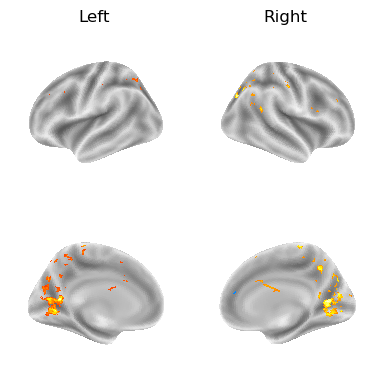

In [52]:
# Plot the FC map

av_fcmap_allsub = fcmap_allsub_whitenoise.mean(axis=0)
av_fcmap_p_allsub = fcmap_allsub_p_whitenoise.mean(axis=0)
# # threshold the Fc maps with the pvalues 
fcmap_thresholded = np.copy(av_fcmap_allsub)
fcmap_thresholded[np.where(av_fcmap_p_allsub>0.05)] = 0

fsaverage = datasets.fetch_surf_fsaverage()
fcmap_img = nib.Nifti1Image(av_fcmap_allsub, sub_affine)
texture_left = surface.vol_to_surf(fcmap_img, fsaverage.pial_left)
texture_right = surface.vol_to_surf(fcmap_img, fsaverage.pial_right)

thresh = 0.2 # Threshold for the brain plots

fig, axs = plt.subplots(2,2, subplot_kw={'projection': '3d'}, figsize=(4,4))
# Left hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                       title='Left', view='lateral',colorbar=False, threshold=thresh, axes=axs[0][0])
# Right hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right,hemi='right',
                       title='Right', view='lateral', colorbar=False, threshold=thresh, axes=axs[0][1])
# Right hemisphere
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left,hemi='left',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][0])
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right,hemi='right',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][1])
plt.tight_layout()
plotting.show()

### t-test

In [53]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection

t_brain = np.zeros(mask.shape)
p_brain_uncorr = np.ones(mask.shape)

mask_coord = np.where(mask == 1)
n_vox = len(mask_coord[0])

t_values = []
p_values = []

# Perform voxel-by-voxel t-test
for v in tqdm(range(n_vox)):
    x, y, z = mask_coord[0][v], mask_coord[1][v], mask_coord[2][v]
    
    # Extract voxel values for both emotions
    allemotions_voxels = fcmap_allsub_allemotions[:, x, y, z]
    whitenoise_voxels = fcmap_allsub_whitenoise[:, x, y, z]
    
    # Perform the t-test
    t, p = ttest_ind(allemotions_voxels, whitenoise_voxels, equal_var=False)
    
    # Store t and p values in the corresponding positions
    t_brain[x, y, z] = t
    p_brain_uncorr[x, y, z] = p
    
    t_values.append(t)
    p_values.append(p)

# Correct for multiple comparisons
rej, p_corr = fdrcorrection(p_values, alpha=0.05)
p_brain_corr = np.ones(mask.shape)

from statsmodels.stats.multitest import multipletests
#rej, p_corr, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')


# Insert corrected p-values into the map
for idx, v in enumerate(range(n_vox)):
    x, y, z = mask_coord[0][v], mask_coord[1][v], mask_coord[2][v]
    p_brain_corr[x, y, z] = p_corr[idx]

100%|████████████████████████████████████| 50151/50151 [01:22<00:00, 606.43it/s]


/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/opt/anaconda3/lib/python3.11/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


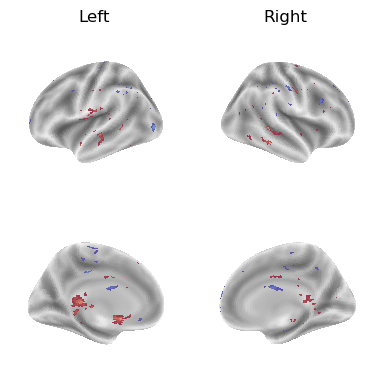

In [62]:
t_brain_thresh = np.copy(t_brain)
t_brain_thresh[p_brain_corr > 0.05] = 0

# Plot on the surface
fsaverage = datasets.fetch_surf_fsaverage()
tmap_img = nib.Nifti1Image(t_brain_thresh, affine=sub_affine)
texture_left = surface.vol_to_surf(tmap_img, fsaverage.pial_left)
texture_right = surface.vol_to_surf(tmap_img, fsaverage.pial_right)

thresh=0.7

fig, axs = plt.subplots(2,2, subplot_kw={'projection': '3d'}, figsize=(4,4))
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left, hemi='left',
                            title='Left', view='lateral', colorbar=False, threshold=thresh, axes=axs[0][0], cmap='twilight')
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right, hemi='right',
                            title='Right', view='lateral', colorbar=False, threshold=thresh, axes=axs[0][1], cmap='twilight')
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, bg_map=fsaverage.sulc_left, hemi='left',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][0], cmap='twilight')
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, bg_map=fsaverage.sulc_right, hemi='right',
                            view='medial', colorbar=False, threshold=thresh, axes=axs[1][1], cmap='twilight')


plt.tight_layout()
plt.show()
